# Applied Data Science

## Clustering And Fitting

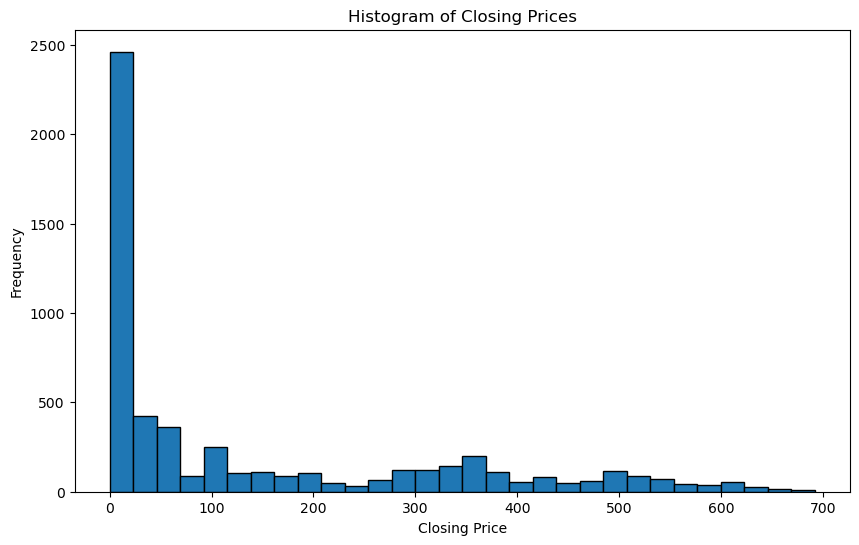

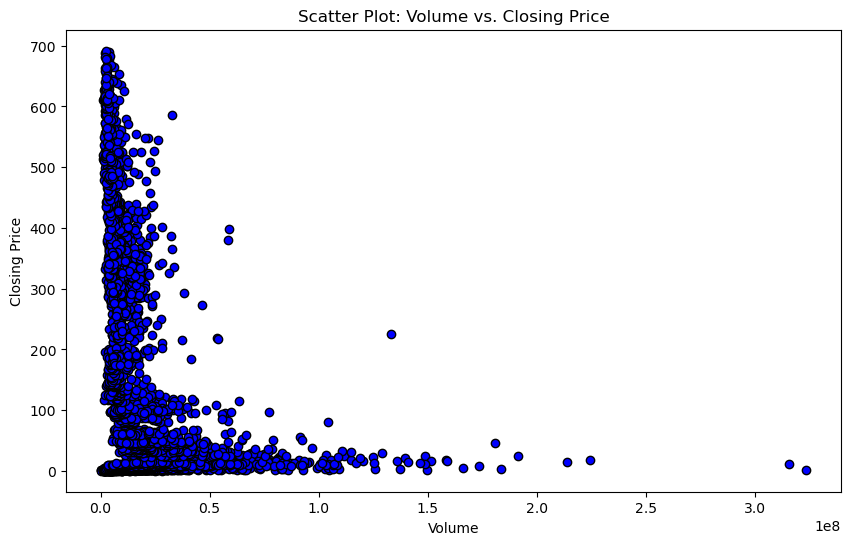

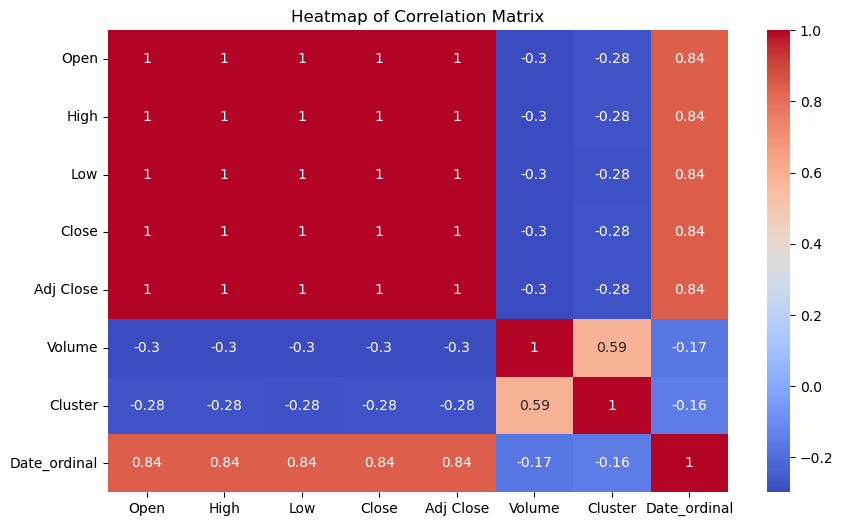

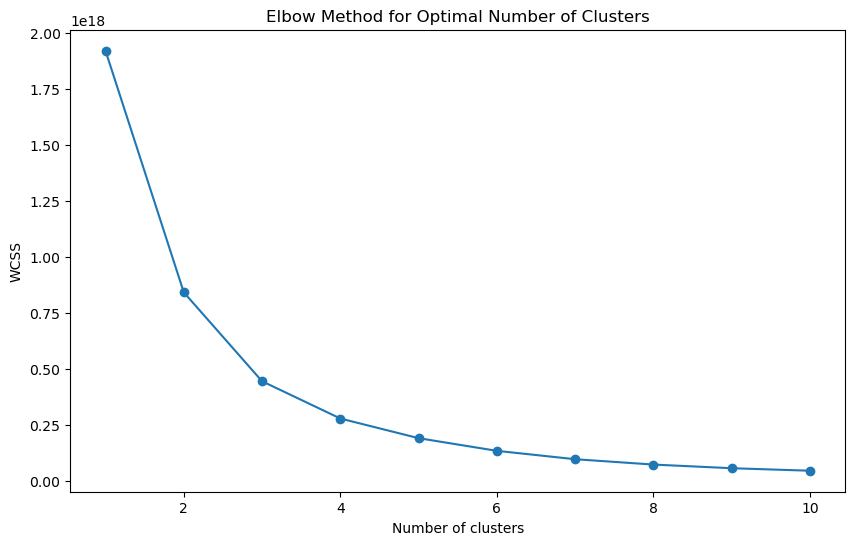

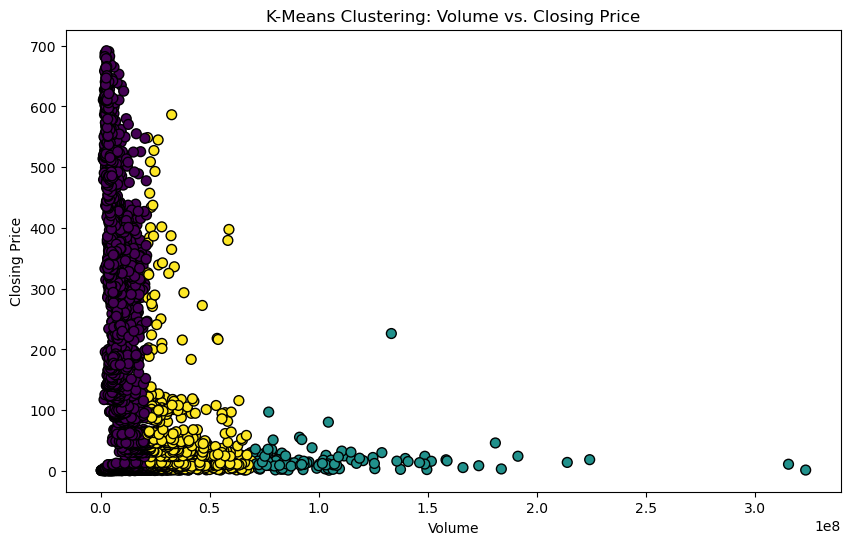

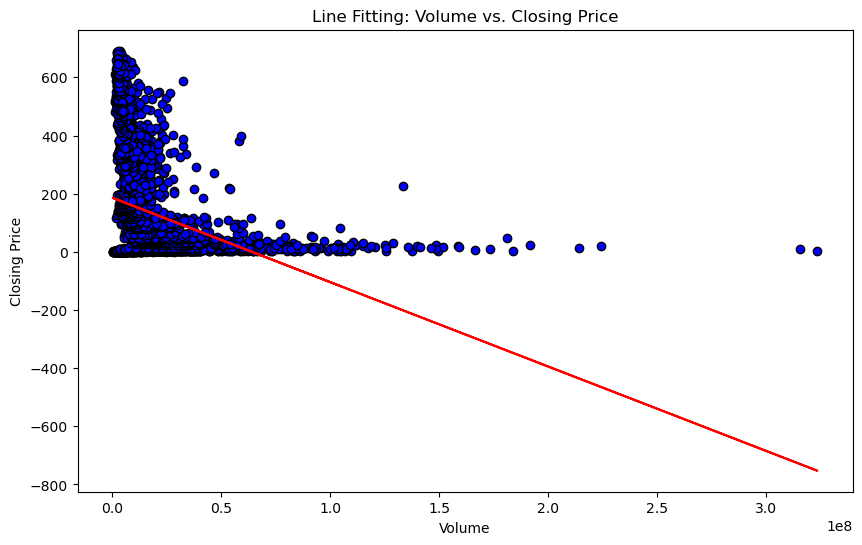

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('./Netflix_Stock_Data_with_Clusters.csv')

# 1. Histogram of Closing Prices
def plot_histogram(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['Close'], bins=30, edgecolor='k')
    plt.title('Histogram of Closing Prices')
    plt.xlabel('Closing Price')
    plt.ylabel('Frequency')
    plt.savefig('histogram_closing_prices.png')
    plt.show()
    plt.close()

# 2. Scatter Plot of Volume vs Closing Price
def plot_scatter(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Volume'], df['Close'], c='blue', marker='o', edgecolor='k')
    plt.title('Scatter Plot: Volume vs. Closing Price')
    plt.xlabel('Volume')
    plt.ylabel('Closing Price')
    plt.savefig('scatter_volume_vs_closing_price.png')
    plt.show()
    plt.close()

# 3. Heatmap of Correlation Matrix
def plot_heatmap(df):
    plt.figure(figsize=(10, 6))
    # Select only numeric columns for the correlation matrix
    numeric_df = df.select_dtypes(include=[float, int])
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Heatmap of Correlation Matrix')
    plt.savefig('heatmap_correlation_matrix.png')
    plt.show()
    plt.close()

# 4. Elbow Method for Optimal Number of Clusters
def plot_elbow(df):
    features = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(features)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), wcss, marker='o')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.savefig('elbow_method.png')
    plt.show()
    plt.close()

# 5. K-Means Clustering: Scatter Plot with Cluster Labels
def plot_kmeans_clustering(df):
    features = df[['Open', 'High', 'Low', 'Close', 'Volume']]
    kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(features)
    df['Cluster'] = clusters

    plt.figure(figsize=(10, 6))
    plt.scatter(df['Volume'], df['Close'], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title('K-Means Clustering: Volume vs. Closing Price')
    plt.xlabel('Volume')
    plt.ylabel('Closing Price')
    plt.savefig('kmeans_clustering.png')
    plt.show()
    plt.close()

# 6. Line Fitting
def plot_line_fitting(df):
    plt.figure(figsize=(10, 6))
    X = df['Volume'].values.reshape(-1, 1)
    y = df['Close'].values.reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, y)
    y_pred = linear_regressor.predict(X)

    plt.scatter(X, y, color='blue', edgecolor='k')
    plt.plot(X, y_pred, color='red')
    plt.title('Line Fitting: Volume vs. Closing Price')
    plt.xlabel('Volume')
    plt.ylabel('Closing Price')
    plt.savefig('line_fitting.png')
    plt.show()
    plt.close()

# Generate all plots
plot_histogram(df)
plot_scatter(df)
plot_heatmap(df)
plot_elbow(df)
plot_kmeans_clustering(df)
plot_line_fitting(df)

# Save the updated dataframe with clusters
df.to_csv('./Netflix_Stock_Data_with_Clusters.csv', index=False)
